### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [3]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

<Axes: title={'center': 'Null Value Count'}>

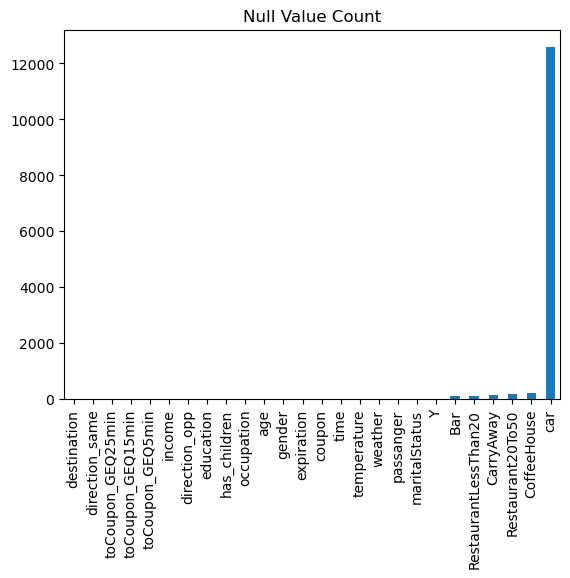

In [4]:
data.isna().sum().sort_values().plot(kind='bar', title='Null Value Count')

The column 'car' seems to have null values in almost all of its users listed.
What does the column 'car' mean though? 
Let's see what does the non-null values look like.

In [5]:
data[~data['car'].isna()]['car'].value_counts()

Scooter and motorcycle                      22
Mazda5                                      22
do not drive                                22
crossover                                   21
Car that is too old to install Onstar :D    21
Name: car, dtype: int64

According to the data's context, I would presume that this represents the vehicle that the user is currently using when he/she received the coupon as he/she is heading towards his/her destination.

The bar-chart also shows that the columns 'Bar', 'RestaurantLessThan20', 'CarryAway', Restaurant20To50', and 'CoffeeHouse' have very few null-values.

3. (1) Decide what to do about your missing data -- drop, replace, other...

Since the column 'car' mostly has null-values, I would say that this column is unreliable. Thus, as part of the data cleaning, I would drop this column.
As for the other columns that also have null-values, since they have very little null-values, I would keep these columns and just get rid of users that have null-values on any of these columns since cleaning away a few users wouldn't impact the data that much.

In [6]:
data_clean = data.drop(columns=['car'])
data_clean.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ5min',
       'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same',
       'direction_opp', 'Y'],
      dtype='object')

<Axes: title={'center': 'Null Value Count After Data Cleaning'}>

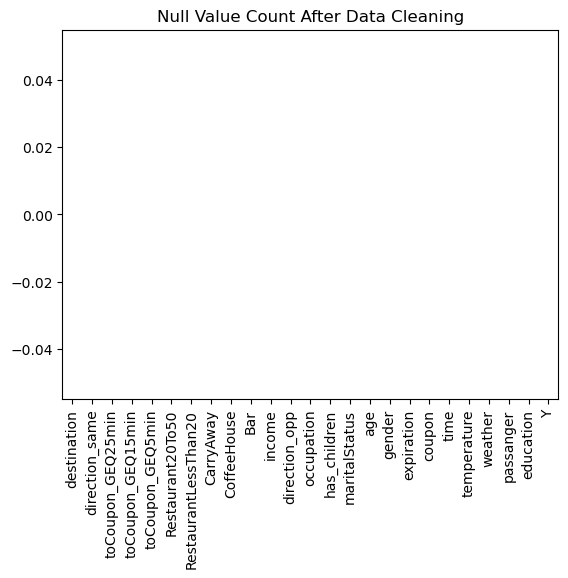

In [7]:
data_clean = data_clean.dropna()
data_clean.isna().sum().sort_values().plot(kind='bar', title='Null Value Count After Data Cleaning')

In [8]:
data.shape[0] - data_clean.shape[0]

605

In [9]:
data_clean.shape[0]

12079

After cleaning, only 605 users were removed, and there are still over 12k users left. Thus, I believe the cleaned data is still sufficiently reliable and accurate.

3. (2) Additional Corrections/Modifications

In [10]:
data_clean.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ5min',
       'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same',
       'direction_opp', 'Y'],
      dtype='object')

I've noticed that the column "passanger" is spelled incorrectly. Thus, I will rename it correctly.

In [11]:
data_clean = data_clean.rename(columns={'passanger':'passenger'})
data_clean.columns

Index(['destination', 'passenger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ5min',
       'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same',
       'direction_opp', 'Y'],
      dtype='object')

I will check on the datatypes in the dataset to see if there are any types I should change for the sake of better data splitting or comparing.

In [12]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12079 entries, 22 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12079 non-null  object
 1   passenger             12079 non-null  object
 2   weather               12079 non-null  object
 3   temperature           12079 non-null  int64 
 4   time                  12079 non-null  object
 5   coupon                12079 non-null  object
 6   expiration            12079 non-null  object
 7   gender                12079 non-null  object
 8   age                   12079 non-null  object
 9   maritalStatus         12079 non-null  object
 10  has_children          12079 non-null  int64 
 11  education             12079 non-null  object
 12  occupation            12079 non-null  object
 13  income                12079 non-null  object
 14  Bar                   12079 non-null  object
 15  CoffeeHouse           12079 non-nul

'time' column catches my attention because its type is an object but may be a good idea to change it into an integer type.

In [13]:
data_clean['time'].unique()

array(['2PM', '10AM', '6PM', '7AM', '10PM'], dtype=object)

For the sake of easier data splitting/comparing, I will change the column 'time' into an integer 24-Hour Clock Time. I will also rename the 'time' column into 'time_hour_24' for better clarification.

In [14]:
def clock(time):
    timeInt = None
    if (time.endswith('AM')) :
        timeInt = time.replace('AM','')
        timeInt = int(timeInt)
        if (timeInt == 12) :
            timeInt = 0
    elif (time.endswith('PM')) :
        timeInt = time.replace('PM','')
        timeInt = int(timeInt) + 12
    return timeInt

In [15]:
data_clean[['time']].head(10)

,time
22,2PM
23,10AM
24,10AM
25,10AM
26,2PM
27,2PM
28,2PM
29,2PM
30,6PM
31,6PM


In [16]:
data_clean['time'] = data_clean['time'].map(clock)

In [17]:
data_clean = data_clean.rename(columns={'time':'time_hour_24'})

In [18]:
data_clean[['time_hour_24']].head(10)

,time_hour_24
22,14
23,10
24,10
25,10
26,14
27,14
28,14
29,14
30,18
31,18


'age' column also catches my attention for the same reason.

In [19]:
data_clean['age'].unique()

array(['21', '46', '26', '31', '41', '50plus', '36', 'below21'],
      dtype=object)

I will change the 'age' column to an integer column as well. For the 'below21', I will just change it into integer 20 and for the '50plus', I will change it into integer 50. I will keep in mind that 20 means users of age 20 or lower and 50 means users of age 50 or higher.

In [20]:
def ageInt(age):
    if ('below' in age):
        age = age.replace('below','')
        age = int(age) - 1
    elif ('plus' in age):
        age = age.replace('plus','')
    return int(age)

In [21]:
data_clean['age'] = data_clean['age'].map(ageInt)

In [22]:
data_clean['age'].info()

<class 'pandas.core.series.Series'>
Int64Index: 12079 entries, 22 to 12683
Series name: age
Non-Null Count  Dtype
--------------  -----
12079 non-null  int64
dtypes: int64(1)
memory usage: 188.7 KB


4. What proportion of the total observations chose to accept the coupon? 



<Axes: title={'center': '(0 - Reject Coupon) (1 - Accept Coupon)'}, ylabel='Y'>

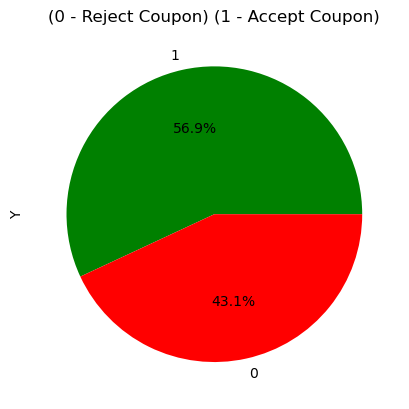

In [23]:
data_clean['Y'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%', colors = ['g', 'r'], title='(0 - Reject Coupon) (1 - Accept Coupon)')

According to the pie chart of the cleaned data, 56.9% chose to accept the coupon which is a little over a half of the users listed in the clean data.

5. Use a bar plot to visualize the `coupon` column.

[Text(0.5, 1.0, 'Coupon Frequency')]

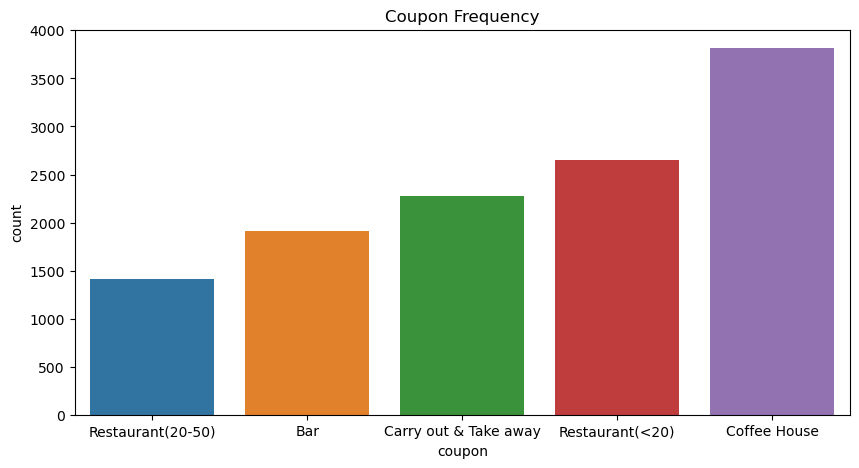

In [24]:
plt.figure(figsize = (10, 5))
sns.countplot(data_clean, x='coupon', 
              order=data_clean['coupon'].value_counts(ascending=True).index).set(title='Coupon Frequency')

Expensive Restaurant coupons ($20-50) are the least frequent coupons in the dataset,
and the Coffee House coupons are the most frequent coupons in the dataset.

6. Use a histogram to visualize the temperature column.

[Text(0.5, 1.0, 'Temperature Frequency')]

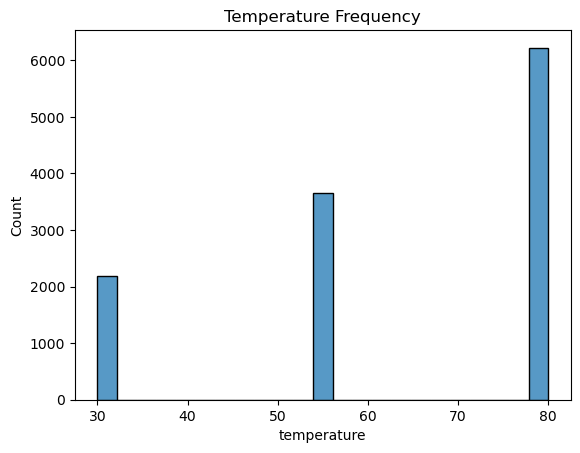

In [25]:
sns.histplot(data_clean['temperature']).set(title='Temperature Frequency')

Apparently, temperature 30F is least frequent, 55F is in between, and 80F is the most frequent.
Seems like there is a positive correlation between temperature and its frequency.

### Investigating the Cheap Restaurant (<20) Coupons

In [26]:
data_clean.columns

Index(['destination', 'passenger', 'weather', 'temperature', 'time_hour_24',
       'coupon', 'expiration', 'gender', 'age', 'maritalStatus',
       'has_children', 'education', 'occupation', 'income', 'Bar',
       'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp', 'Y'],
      dtype='object')

I suspect that the three columns: 'RestaurantLessThan20', 'Restaurant20To50', and 'income' would most likely have an affect on the users deciding on whether they will accept the cheap restaurant coupon or not.
Thus, I will investigate these three columns.

Since I am just focusing on the Cheap Restaurant Coupon, I will query the cleaned data to only users who received the Cheap Restaurant coupon.

In [27]:
cheap_rest_coupon = data_clean.query('coupon == "Restaurant(<20)"')
cheap_rest_coupon[['coupon']].sample(10)

,coupon
2767,Restaurant(<20)
12146,Restaurant(<20)
10857,Restaurant(<20)
12532,Restaurant(<20)
11438,Restaurant(<20)
11838,Restaurant(<20)
1600,Restaurant(<20)
11436,Restaurant(<20)
7269,Restaurant(<20)
2056,Restaurant(<20)


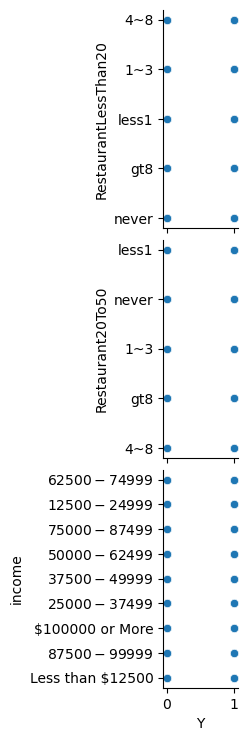

In [28]:
sns.pairplot(cheap_rest_coupon, y_vars=['RestaurantLessThan20', 'Restaurant20To50', 'income'], x_vars=['Y'])

Scatterplots DO NOT help especially when users who accept or reject the coupon can vary in their backgrounds.
Thus, I don't think I will be using scatterplots from now on.

Let's find the acceptance rate of all users who have received the cheap restaurant coupons.

<Axes: title={'center': '<20 Resto Coupon Approval'}, ylabel='Y'>

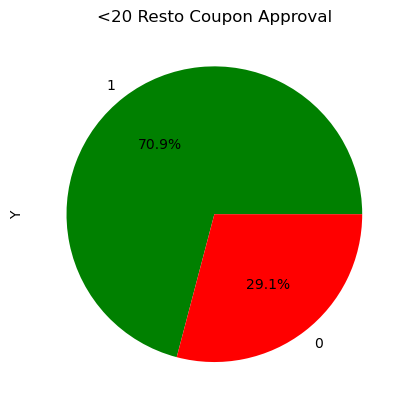

In [29]:
cheap_rest_coupon['Y'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%', colors = ['g', 'r'], 
        title='<20 Resto Coupon Approval')

It would seem that most users listed are enthusiastic on accepting the cheap restaurant coupons.

I will then investigate their acceptance rate based on some conditions related to these three columns:

- monthly visit to <$20 restaurants

- monthly visit to $20-50 restaurants

- income

Let's see their acceptance rate of the cheap restaurant coupon if they monthly visit the cheap restaurant more than once.

In [30]:
more_than_once = ['1~3','4~8','gt8']
once_cheap_rest = cheap_rest_coupon.query('RestaurantLessThan20 in @more_than_once')
once_cheap_rest[['RestaurantLessThan20']].sample(10)

,RestaurantLessThan20
10716,1~3
6843,1~3
9057,4~8
7049,4~8
5641,1~3
5729,1~3
9539,1~3
8821,1~3
7740,4~8
1611,gt8


<Axes: title={'center': '<20 Restaurant Coupon Acceptance Rate (Monthly <20 Resto Visit >= 1)'}, ylabel='Y'>

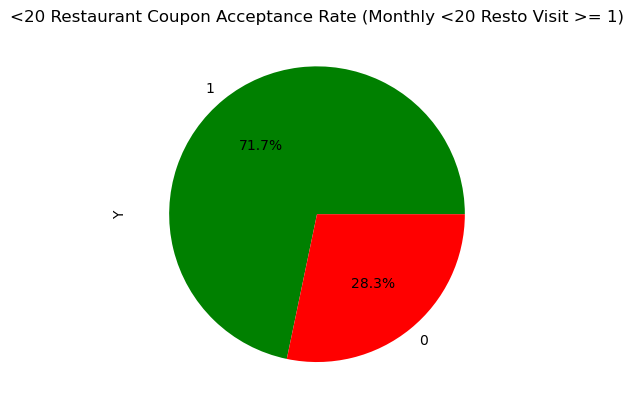

In [31]:
once_cheap_rest['Y'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%', colors = ['g', 'r'], 
        title='<20 Restaurant Coupon Acceptance Rate (Monthly <20 Resto Visit >= 1)')

Out of curiousity, let's see if the acceptance rate increase for users who monthly visit cheap restaurants more than 3 times.

In [32]:
more_than_4 = ['4~8','gt8']

In [33]:
x4_cheap_rest = cheap_rest_coupon.query('RestaurantLessThan20 in @more_than_4')
x4_cheap_rest[['RestaurantLessThan20']].sample(10)

,RestaurantLessThan20
5110,gt8
7629,4~8
142,4~8
1088,4~8
6957,4~8
12114,4~8
5853,gt8
3886,4~8
2701,4~8
2406,gt8


<Axes: title={'center': '<20 Restaurant Coupon Acceptance Rate (Monthly <20 Resto Visit > 3)'}, ylabel='Y'>

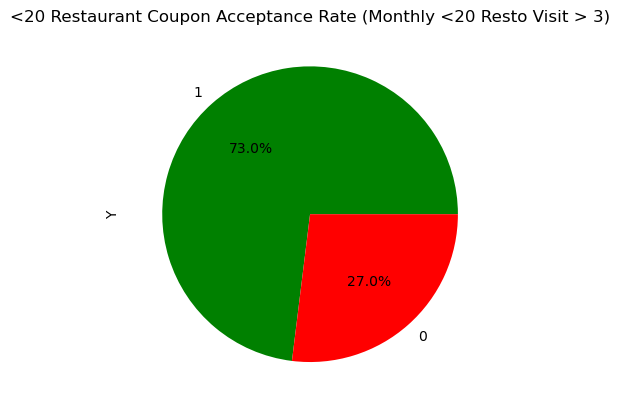

In [34]:
x4_cheap_rest['Y'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%', colors = ['g', 'r'], 
        title='<20 Restaurant Coupon Acceptance Rate (Monthly <20 Resto Visit > 3)')

Looks like it has increase slightly but not that much. Now, let's compare the acceptance rate to users who monthly visit the cheap restaurant less than once, i.e. they might still visit but not every month.

In [35]:
less_than_1 = ['never','less1']
less_than_1

['never', 'less1']

In [36]:
less1_cheap_rest = cheap_rest_coupon.query('RestaurantLessThan20 in @less_than_1')
less1_cheap_rest[['RestaurantLessThan20']].sample(10)

,RestaurantLessThan20
8015,less1
11008,less1
8230,less1
11338,less1
2271,less1
5296,less1
11585,less1
7817,less1
2921,less1
11221,less1


<Axes: title={'center': '<20 Restaurant Coupon Acceptance Rate (Monthly <20 Resto Visit < 1)'}, ylabel='Y'>

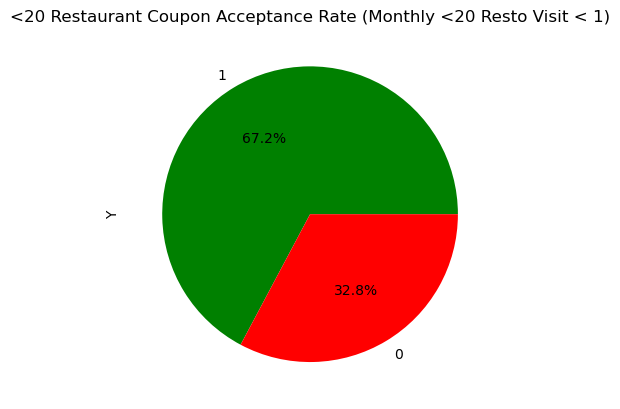

In [37]:
less1_cheap_rest['Y'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%', colors = ['g', 'r'], 
        title='<20 Restaurant Coupon Acceptance Rate (Monthly <20 Resto Visit < 1)')

Surprisingly, more than half of these users still use the cheap restaurant coupons but the acceptance rate has indeed decreased.

Now, let's add monthly visit to expensive ($20-50) restaurants and income as additional conditions.
In fact, let's creatively make a mixture of conditions and observe their acceptance rate.
Let's also compare each acceptance rate to other users who don't meet its respective conditions.

1. Users who monthly visit cheap restaurants more than once but expensive restaurants less than once.

In [38]:
once_cheap_less_exp = once_cheap_rest.query('Restaurant20To50 in @less_than_1')
once_cheap_less_exp[['RestaurantLessThan20','Restaurant20To50']].sample(10)

,RestaurantLessThan20,Restaurant20To50
596,1~3,less1
6688,1~3,less1
11110,4~8,never
10780,1~3,less1
10213,4~8,less1
1424,1~3,less1
2807,4~8,less1
10919,1~3,less1
5274,4~8,less1
10897,4~8,less1


<Axes: title={'center': '<20 Restaurant Coupon Acceptance Rate (Monthly <20 Resto Visit >= 1, Monthly 20-50 Resto Visit < 1)'}, ylabel='Y'>

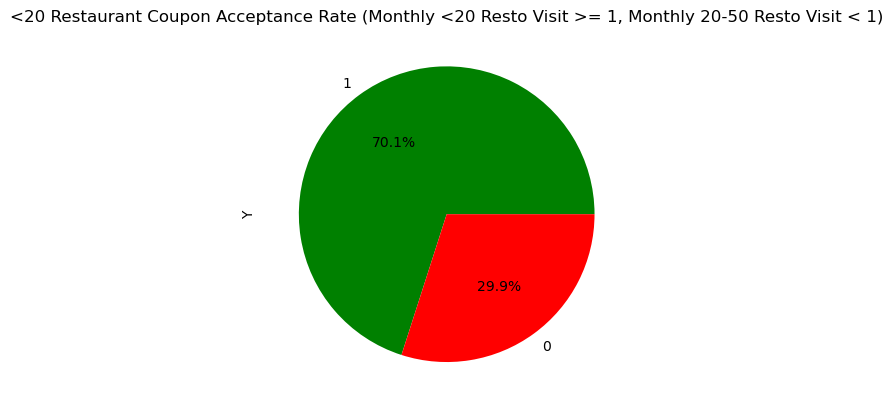

In [39]:
once_cheap_less_exp['Y'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%', colors = ['g', 'r'], 
        title='<20 Restaurant Coupon Acceptance Rate (Monthly <20 Resto Visit >= 1, Monthly 20-50 Resto Visit < 1)')

In [40]:
others_1 = cheap_rest_coupon.query('RestaurantLessThan20 in @less_than_1 or Restaurant20To50 not in @less_than_1')

In [41]:
# As you can see, this is a sample() method used as an alternative confirmation that the dataframe is queried as I expect
# considering that unique() method cannot be used in this case because of the 'or' statement within the query.
others_1[['RestaurantLessThan20','Restaurant20To50']].sample(5)

,RestaurantLessThan20,Restaurant20To50
7617,1~3,4~8
2034,4~8,1~3
8582,1~3,1~3
2842,less1,less1
11064,less1,less1


<Axes: title={'center': 'Others_1'}, ylabel='Y'>

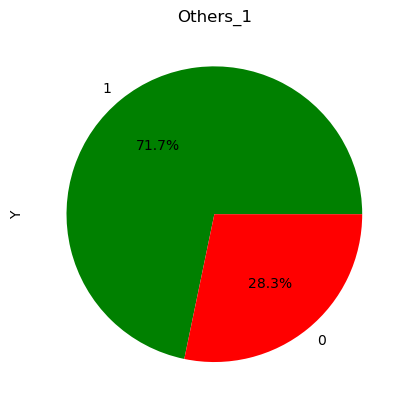

In [42]:
others_1['Y'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%', colors = ['g', 'r'], 
        title='Others_1')

The Others_1 Pie Chart shows a slightly higher acceptance rate which implies that users who monthly visit cheap restaurants more than once yet monthly visit expensive restaurants less than once would less likely accept the cheap restaurant coupons compared to all others.

2. Users who monthly visit more than once on both cheap and expensive restaurants

In [43]:
once_cheap_exp = once_cheap_rest.query('Restaurant20To50 in @more_than_once')
once_cheap_exp[['RestaurantLessThan20','Restaurant20To50']].sample(10)

,RestaurantLessThan20,Restaurant20To50
2051,4~8,1~3
9251,4~8,1~3
12671,4~8,1~3
611,gt8,1~3
9764,1~3,1~3
7018,1~3,1~3
684,1~3,1~3
12364,4~8,1~3
7638,4~8,1~3
8851,1~3,1~3


<Axes: title={'center': '<20 Restaurant Coupon Acceptance Rate (Monthly <20, 20-50 Resto Visit >= 1)'}, ylabel='Y'>

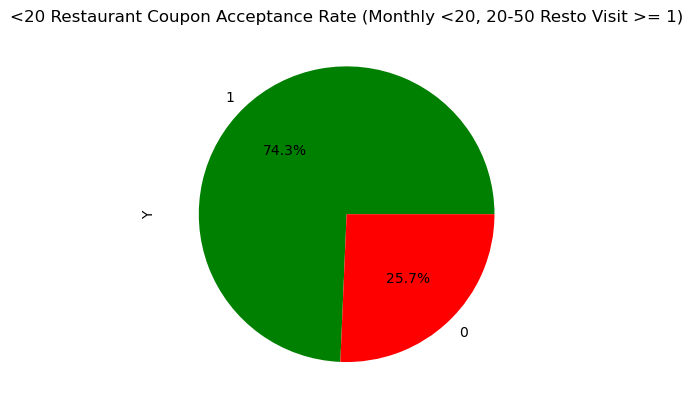

In [44]:
once_cheap_exp['Y'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%', colors = ['g', 'r'], 
        title='<20 Restaurant Coupon Acceptance Rate (Monthly <20, 20-50 Resto Visit >= 1)')

In [45]:
others_2 = cheap_rest_coupon.query('RestaurantLessThan20 in @less_than_1 or Restaurant20To50 in @less_than_1')

In [46]:
others_2[['RestaurantLessThan20','Restaurant20To50']].sample(5)

,RestaurantLessThan20,Restaurant20To50
71,1~3,less1
1983,4~8,less1
4679,less1,never
11729,4~8,never
8339,1~3,less1


<Axes: title={'center': 'Others_2'}, ylabel='Y'>

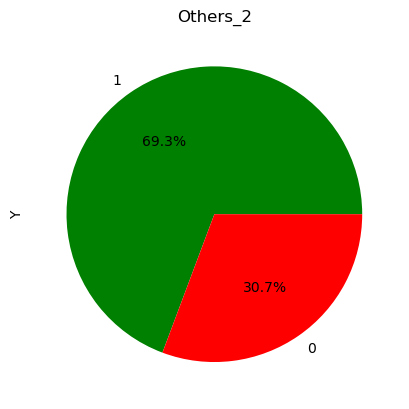

In [47]:
others_2['Y'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%', colors = ['g', 'r'], 
        title='Others_2')

It would seem that users who visit both cheap and expensive restaurants more than once are more likely to accept the cheap restaurant coupon compared to all other users.

3. Users who monthly visit a cheap and expensive restaurants more than once and has an income less than 50k

In [48]:
data_clean['income'].unique()

array(['$62500 - $74999', '$12500 - $24999', '$75000 - $87499',
       '$50000 - $62499', '$37500 - $49999', '$25000 - $37499',
       '$100000 or More', '$87500 - $99999', 'Less than $12500'],
      dtype=object)

In [49]:
less_than_50k = ['Less than $12500','$12500 - $24999','$25000 - $37499','$37500 - $49999']
less_than_50k

['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999']

In [50]:
once_less_50k = once_cheap_rest.query('Restaurant20To50 in @more_than_once and income in @less_than_50k')

In [51]:
once_less_50k[['RestaurantLessThan20','Restaurant20To50','income']].sample(5)

,RestaurantLessThan20,Restaurant20To50,income
11635,1~3,1~3,Less than $12500
10584,gt8,1~3,$37500 - $49999
7790,gt8,gt8,$37500 - $49999
9317,1~3,1~3,$25000 - $37499
3954,1~3,1~3,$12500 - $24999


<Axes: title={'center': '<20 Restaurant Coupon Acceptance Rate (Monthly <20, 20-50 Resto Visit >= 1, Income < $50k)'}, ylabel='Y'>

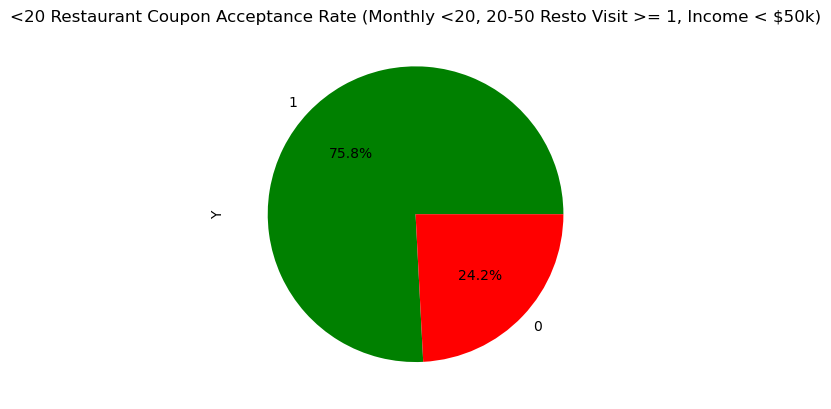

In [52]:
once_less_50k['Y'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%', colors = ['g', 'r'], 
        title='<20 Restaurant Coupon Acceptance Rate (Monthly <20, 20-50 Resto Visit >= 1, Income < $50k)')

In [53]:
others_3 = cheap_rest_coupon.query(
    'RestaurantLessThan20 not in @more_than_once or Restaurant20To50 not in @more_than_once or income not in @less_than_50k')

In [54]:
others_3[['RestaurantLessThan20','Restaurant20To50','income']].sample(5)

,RestaurantLessThan20,Restaurant20To50,income
12221,1~3,less1,$12500 - $24999
8371,gt8,less1,$12500 - $24999
10309,4~8,less1,$100000 or More
1001,never,never,$25000 - $37499
10155,1~3,1~3,$75000 - $87499


<Axes: title={'center': 'Others_3'}, ylabel='Y'>

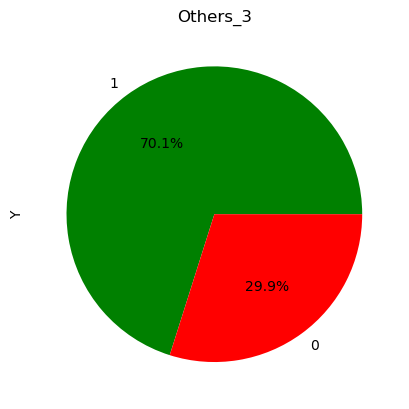

In [55]:
others_3['Y'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%', colors = ['g', 'r'], 
        title='Others_3')

It would seem that having less than $50k income in addition may increase the user's likelihood to accept the coupon.

Would users more likely accept the coupon if they have even lower income in addition? Let's confirm that.

Let's query the users' income to go down to less than $25k this time.

In [56]:
less_than_25k = less_than_50k.copy()
less_than_25k.remove('$25000 - $37499')
less_than_25k.remove('$37500 - $49999')
less_than_25k

['Less than $12500', '$12500 - $24999']

In [57]:
once_less_25k = once_cheap_rest.query('Restaurant20To50 in @more_than_once and income in @less_than_25k')

In [58]:
once_less_25k[['RestaurantLessThan20','Restaurant20To50','income']].sample(5)

,RestaurantLessThan20,Restaurant20To50,income
10650,4~8,1~3,Less than $12500
11044,4~8,4~8,Less than $12500
10652,4~8,1~3,Less than $12500
10561,4~8,4~8,$12500 - $24999
12524,4~8,1~3,$12500 - $24999


<Axes: title={'center': '<20 Restaurant Coupon Acceptance Rate (Monthly <20, 20-50 Resto Visit >= 1, Income < $25k)'}, ylabel='Y'>

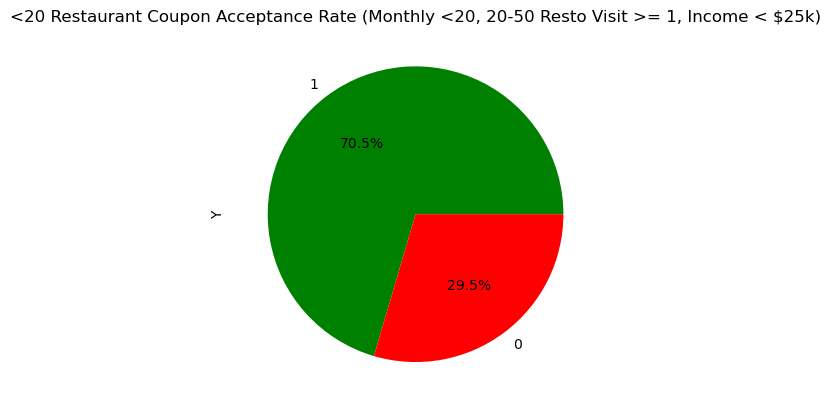

In [59]:
once_less_25k['Y'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%', colors = ['g', 'r'], 
        title='<20 Restaurant Coupon Acceptance Rate (Monthly <20, 20-50 Resto Visit >= 1, Income < $25k)')

In [60]:
others_4 = cheap_rest_coupon.query(
    'RestaurantLessThan20 not in @more_than_once or Restaurant20To50 not in @more_than_once or income not in @less_than_25k')

In [61]:
others_4[['RestaurantLessThan20','Restaurant20To50','income']].sample(5)

,RestaurantLessThan20,Restaurant20To50,income
4950,1~3,less1,$25000 - $37499
1192,gt8,4~8,$100000 or More
9049,4~8,less1,$62500 - $74999
6129,1~3,less1,$75000 - $87499
5198,1~3,less1,$37500 - $49999


<Axes: title={'center': 'Others_4'}, ylabel='Y'>

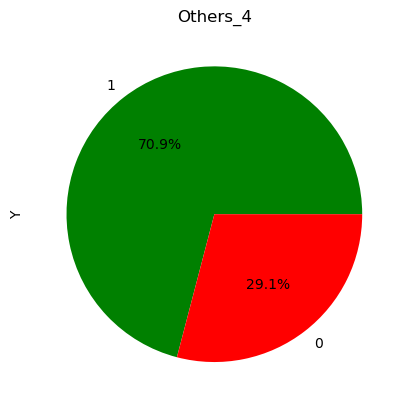

In [62]:
others_4['Y'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%', colors = ['g', 'r'], 
        title='Others_4')

Apparently that is not the case as users with income lower than $25k in addition are less likely to accept the cheap restaurant coupons.

What about users with higher income, higher than $50k?

In [63]:
once_high_50k = once_cheap_exp.query('income not in @less_than_50k')

In [64]:
once_high_50k[['RestaurantLessThan20','Restaurant20To50','income']].sample(5)

,RestaurantLessThan20,Restaurant20To50,income
7969,gt8,4~8,$62500 - $74999
7991,1~3,1~3,$75000 - $87499
12248,1~3,1~3,$100000 or More
1565,1~3,1~3,$100000 or More
12666,4~8,1~3,$75000 - $87499


<Axes: title={'center': '<20 Restaurant Coupon Acceptance Rate (Monthly <20, 20-50 Resto Visit >= 1, Income > $50k)'}, ylabel='Y'>

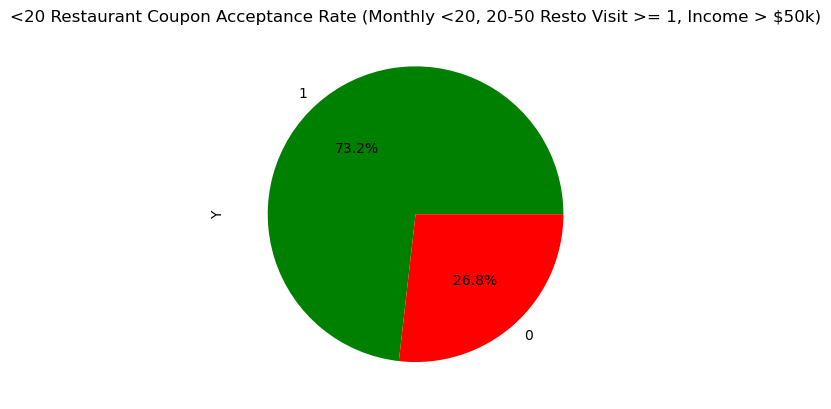

In [65]:
once_high_50k['Y'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%', colors = ['g', 'r'], 
        title='<20 Restaurant Coupon Acceptance Rate (Monthly <20, 20-50 Resto Visit >= 1, Income > $50k)')

In [66]:
others_5 = cheap_rest_coupon.query(
    'RestaurantLessThan20 not in @more_than_once or Restaurant20To50 not in @more_than_once or income in @less_than_50k')

In [67]:
others_5[['RestaurantLessThan20','Restaurant20To50','income']].sample(5)

,RestaurantLessThan20,Restaurant20To50,income
11908,1~3,less1,$100000 or More
10412,less1,never,$37500 - $49999
7202,1~3,less1,$37500 - $49999
3015,less1,less1,$12500 - $24999
2040,4~8,1~3,$25000 - $37499


<Axes: title={'center': 'Others_5'}, ylabel='Y'>

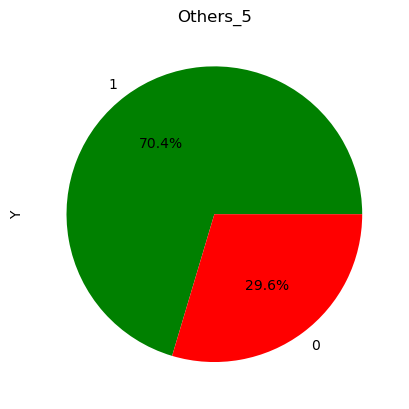

In [68]:
others_5['Y'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%', colors = ['g', 'r'], 
        title='Others_5')

There's a little increase on over the $50k as well.

Perhaps users with income $37.5-62.5k will have more likelihood of accepting the coupon. Let's find out.

In [69]:
income_37_62 = ['$37500 - $49999','$50000 - $62499']
income_37_62

['$37500 - $49999', '$50000 - $62499']

In [70]:
df_income_37_62 = once_cheap_exp.query('income in @income_37_62')

In [71]:
df_income_37_62['RestaurantLessThan20'].unique()

array(['gt8', '1~3', '4~8'], dtype=object)

In [72]:
df_income_37_62['Restaurant20To50'].unique()

array(['gt8', '1~3', '4~8'], dtype=object)

In [73]:
df_income_37_62['income'].unique()

array(['$37500 - $49999', '$50000 - $62499'], dtype=object)

<Axes: title={'center': '<20 Resto Coupon Acceptance Rate (Monthly <20, 20-50 Resto Visit >= 1, $37.5 <= Income <= $62.5k)'}, ylabel='Y'>

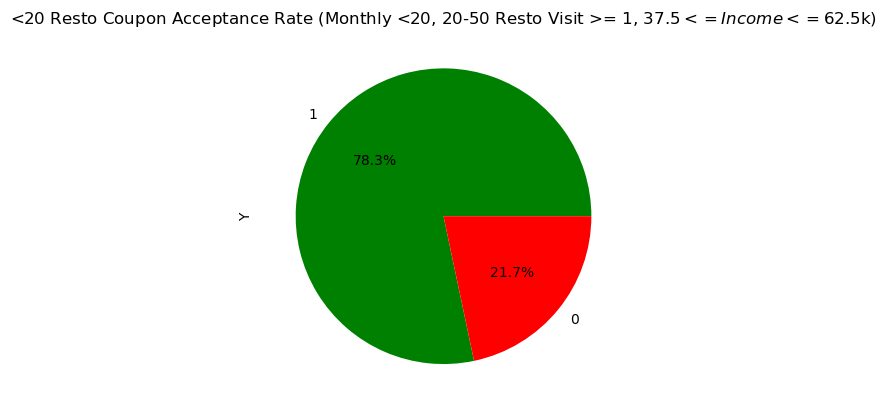

In [74]:
df_income_37_62['Y'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%', colors = ['g', 'r'], 
        title='<20 Resto Coupon Acceptance Rate (Monthly <20, 20-50 Resto Visit >= 1, $37.5 <= Income <= $62.5k)')

In [75]:
others_6 = cheap_rest_coupon.query(
    'RestaurantLessThan20 not in @more_than_once or Restaurant20To50 not in @more_than_once or income not in @income_37_62')

In [76]:
others_6[['RestaurantLessThan20','Restaurant20To50','income']].sample(5)

,RestaurantLessThan20,Restaurant20To50,income
10439,gt8,4~8,Less than $12500
1111,1~3,less1,$75000 - $87499
414,1~3,less1,$50000 - $62499
10352,never,never,$25000 - $37499
11021,4~8,1~3,$25000 - $37499


<Axes: title={'center': 'Others_6'}, ylabel='Y'>

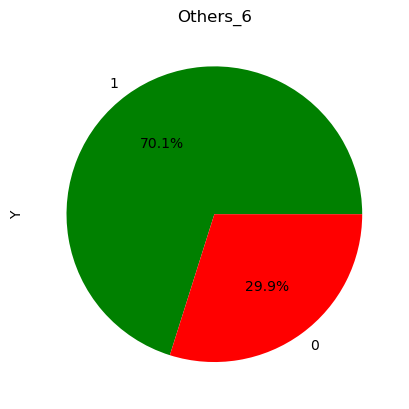

In [77]:
others_6['Y'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%', colors = ['g', 'r'], 
        title='Others_6')

**Final Conclusion**

To sum up my investigation of the cheap restaurant coupons, it would seem that most users (about %70) are eager to accept the cheap restaurant coupons.

What's more, I can hypothesize that users who visit more cheap and expensive restaurants are more likely to accept the coupon. 

Having an income of between $(37.5-62.5)k in addition seems to also greatly encourage them to accept the coupon.

**Recommended Action**

I suggest offering Cheap (<20) Restaurant Coupons to users who are frequent visitors to both cheap and expensive restaurants. Among these specified users, I suggest on mainly targeting users whose income is within $(37.5-62.5)k range.

*Note: Due to the tedious repetitiveness of creating "Others" pie charts in the last investigation and how I find them to be informatively unreliable most of the time, I will no longer create them from now on unless I actually find use in them.*
*I also find the lack of format freedom in matplotlib titles and how my titles may be obnoxiously long so I am going to sometimes rely on textual Markdown as my pie chart titles.*